<a href="https://www.kaggle.com/code/prakashreddybussu/diabetes-prediction-by-keras-classification?scriptVersionId=189402571" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/100000-diabetes-clinical-dataset/diabetes_dataset.csv


# Importing Dataset

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df=pd.read_csv('/kaggle/input/100000-diabetes-clinical-dataset/diabetes_dataset.csv')

# Data cleaning

In [4]:
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

In [6]:
df.drop('year',axis=1,inplace=True)

In [7]:
df=pd.get_dummies(df,columns=['gender'],drop_first=True)


In [8]:
df.head()


,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other
0,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0,False,False
1,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0,False,False
2,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0,True,False
3,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0,True,False
4,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0,False,False


In [9]:
df['gender_Male']=df['gender_Male'].astype(int)

In [10]:
df['gender_Other']=df['gender_Other'].astype(int)

In [11]:
df['smoking_history'].unique()

array(['never', 'not current', 'current', 'No Info', 'ever', 'former'],
      dtype=object)

<Axes: >

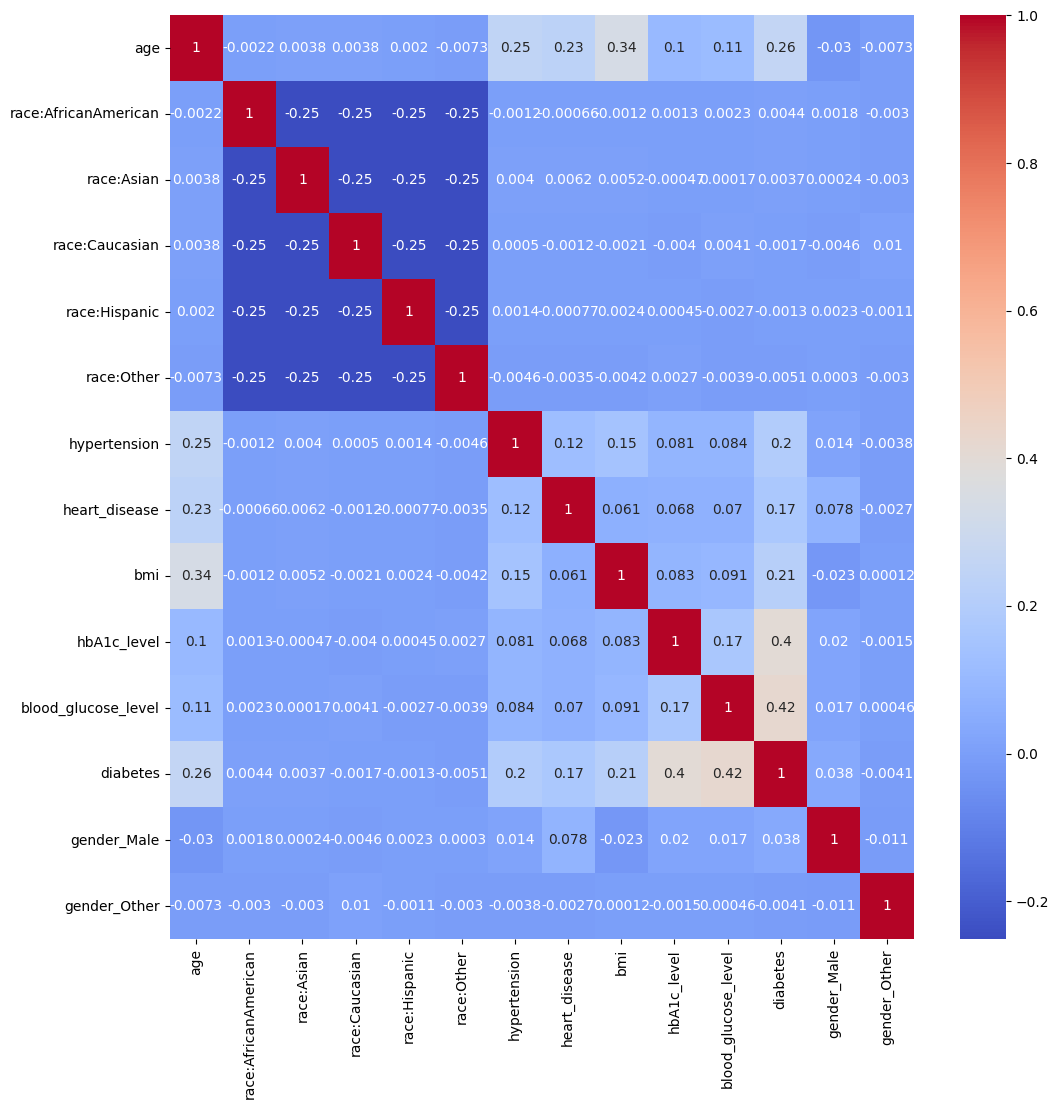

In [12]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

According to the correlation matrix the features 'age','hypertendion' 'hbA1c_level','bmi','heart disease' and blood_glucose_level are highly correlated with the target variable 'diabetes'. Therefore, we will use these features to predict the target variable.

# Train Test Split

In [13]:
X=df[['age','hypertension','hbA1c_level','bmi','heart_disease','blood_glucose_level']]
y=df['diabetes']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=101)

# Scaling Data

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scale=MinMaxScaler()

In [18]:
X_train=scale.fit_transform(X_train)

In [19]:
X_test=scale.transform(X_test)

# Creating Model

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Activation,Dense

2024-07-23 06:04:19.163774: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-23 06:04:19.163948: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-23 06:04:19.350708: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [21]:
model=Sequential()
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

# training Model

In [22]:
model.fit(x=X_train,y=y_train,epochs=100,validation_data=(X_test,y_test),verbose=1)

Epoch 1/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.2064 - val_loss: 0.1297
Epoch 2/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1154 - val_loss: 0.1107
Epoch 3/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1088 - val_loss: 0.1112
Epoch 4/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1048 - val_loss: 0.1025
Epoch 5/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0998 - val_loss: 0.1002
Epoch 6/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0980 - val_loss: 0.0933
Epoch 7/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0918 - val_loss: 0.0896
Epoch 8/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0913 - val_loss: 0.0917
Epoch 9/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0871 - val_loss: 0.0871
Epoch 10/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0846 - val_loss: 0.0894
Epoch 11/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0869 - val_loss: 0.0910
Epoch 12/100
2188/2

<Axes: >

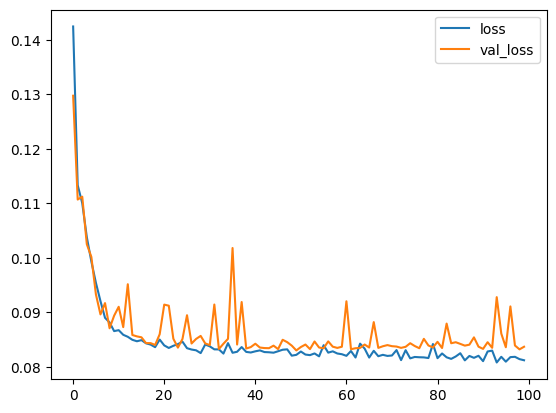

In [23]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

As you see in above graph we can say that graph is clearly got overfitted as we trained 100 epochs so instead to make it fit correctly we use Early Stopping and Dropout layers. 

## Early Stopping

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [26]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0787 - val_loss: 0.0840
Epoch 2/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0791 - val_loss: 0.0838
Epoch 3/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0849 - val_loss: 0.0870
Epoch 4/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0818 - val_loss: 0.0835
Epoch 5/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0803 - val_loss: 0.0916
Epoch 6/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0853 - val_loss: 0.0834
Epoch 7/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0805 - val_loss: 0.0842
Epoch 8/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0811 - val_loss: 0.0845
Epoch 9/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0812 - val_loss: 0.0835
Epoch 10/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0808 - val_loss: 0.0836
Epoch 11/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0806 - val_loss: 0.0898
Epoch 12/100
2188/2

<Axes: >

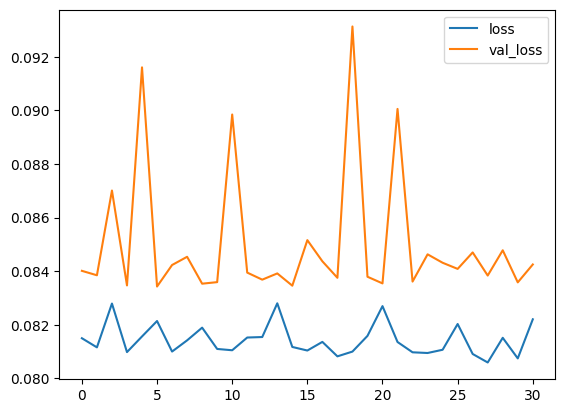

In [27]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Adding droupouts

In [28]:
model=Sequential()
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [29]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,batch_size=256,
          callbacks=[early_stop]
          )

Epoch 1/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3922 - val_loss: 0.1379
Epoch 2/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1475 - val_loss: 0.1168
Epoch 3/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1295 - val_loss: 0.1097
Epoch 4/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1169 - val_loss: 0.1042
Epoch 5/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1119 - val_loss: 0.1006
Epoch 6/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1083 - val_loss: 0.0962
Epoch 7/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1044 - val_loss: 0.0943
Epoch 8/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1005 - val_loss: 0.0911
Epoch 9/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1025 - val_loss: 0.0894
Epoch 10/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0968 - val_loss: 0.0886
Epoch 11/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0955 - val_loss: 0.0877
Epoch 12/100
274/274 ━━━━━━━━━━━━━━━━━━━━

<Axes: >

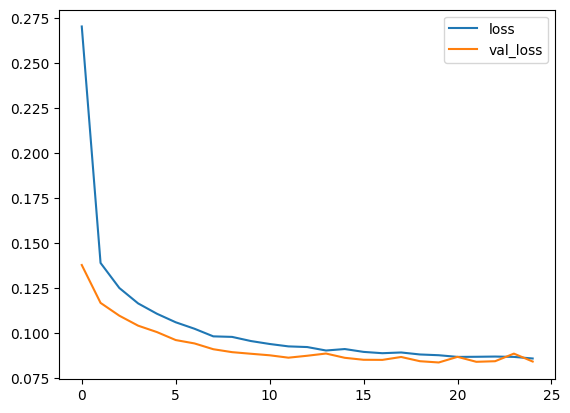

In [30]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Predicting and Evaluation

In [31]:
prediction=(model.predict(X_test)>0.5).astype('int32')

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [32]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [33]:
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))
print(accuracy_score(y_test,prediction))

[[27422     0]
 [  862  1716]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     27422
           1       1.00      0.67      0.80      2578

    accuracy                           0.97     30000
   macro avg       0.98      0.83      0.89     30000
weighted avg       0.97      0.97      0.97     30000

0.9712666666666666


# Testing a Single set of data on our Model

lets predict a customer with below information if he as diabetes or not:
*  age : 40
*  hypertension : 1
*  hbA1c_leve : 6.5
*  bmi : 28.9
*  heart_disease : 0
*  blood_glucose_level : 166


In [34]:
prediction=(model.predict(scale.transform(np.array([[40,1,6.5,28.9,0,166]])))>0.5).astype('int32')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [35]:
prediction

array([[0]], dtype=int32)

therefore, the customer with above results will not be having the diabetes.